In [74]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For A/B Test
from scipy import stats

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


# For saving models
import pickle

In [2]:
df=pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

### Data exploration and cleaning

In [3]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [4]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [6]:
# Convert data columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

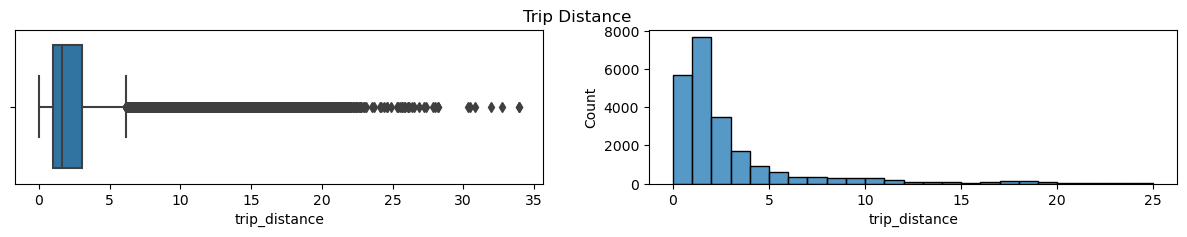

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 2))
fig.suptitle('Trip Distance')
sns.boxplot(ax=axes[0], x=df['trip_distance'])
sns.histplot(ax=axes[1], x=df['trip_distance'], bins=range(0,26,1))
plt.show();

The majority of trips were journeys of less than two miles. The number of trips falls away steeply as the distance traveled increases beyond two miles.

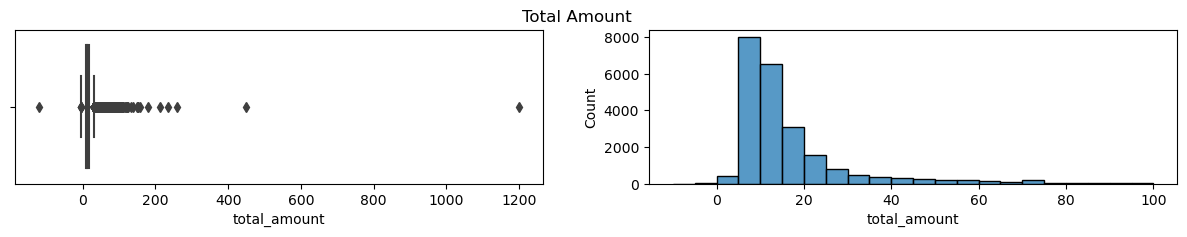

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 2))
fig.suptitle('Total Amount')
sns.boxplot(ax=axes[0], x=df['total_amount'])
sns.histplot(ax=axes[1], x=df['total_amount'], bins=range(-10,101,5))
plt.show()

The total cost of each trip has a distribution that skews right, with most costs falling in the $5-15 range.

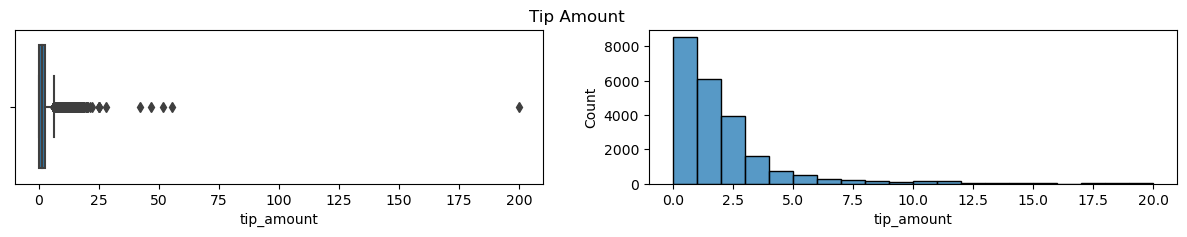

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 2))
fig.suptitle('Tip Amount')
sns.boxplot(ax=axes[0], x=df['tip_amount'])
sns.histplot(ax=axes[1], x=df['tip_amount'], bins=range(0,21,1))
plt.show()

The distribution for tip amount is right-skewed, with nearly all the tips in the $0-3 range.

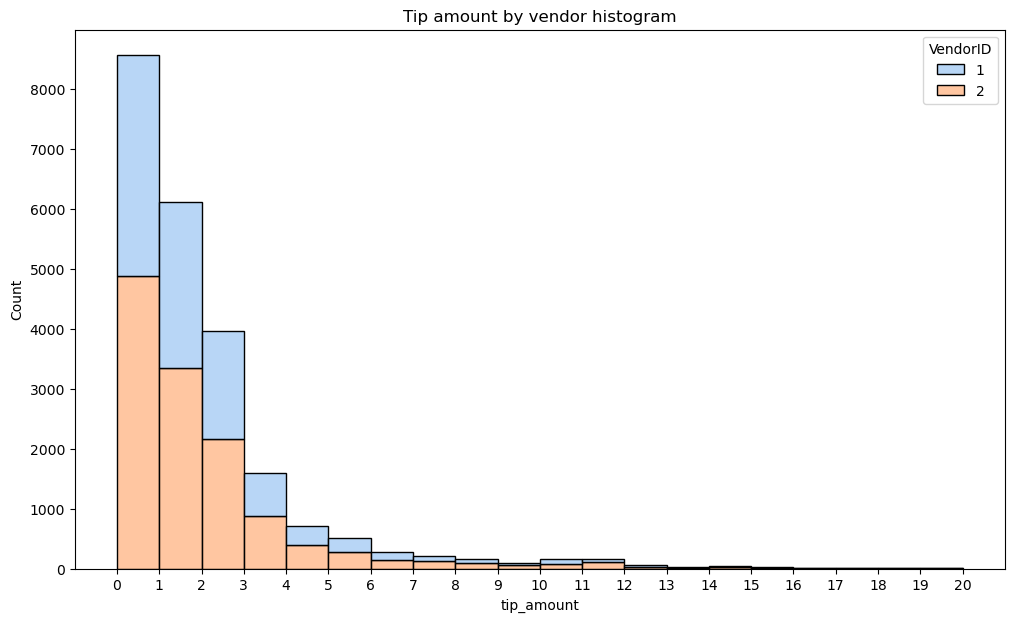

In [10]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by vendor histogram');

When analyzing the tip amounts according to vendors, it's evident that there aren't any significant anomalies in the distribution of tips between the two vendors within the dataset. Vendor two does handle a slightly larger portion of the rides, and interestingly, this proportion remains relatively consistent across various tip amounts.







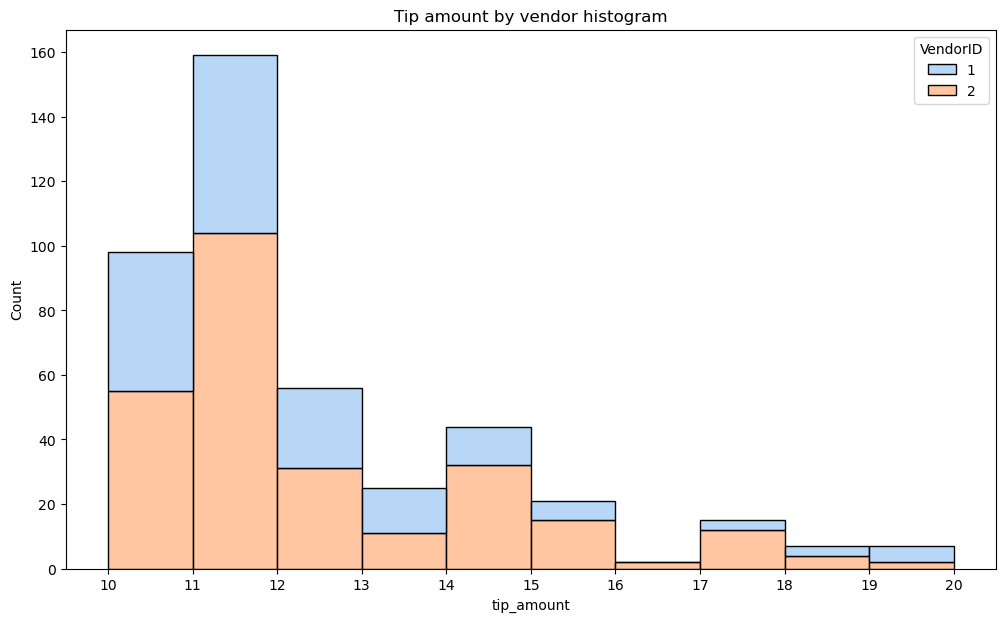

In [11]:
# Create histogram of tip_amount by vendor for tips > $10 
tips_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_over_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by vendor histogram');

The proportions are maintained even at these higher tip amounts, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.

Examine the unique values in the passenger_count column.

In [12]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

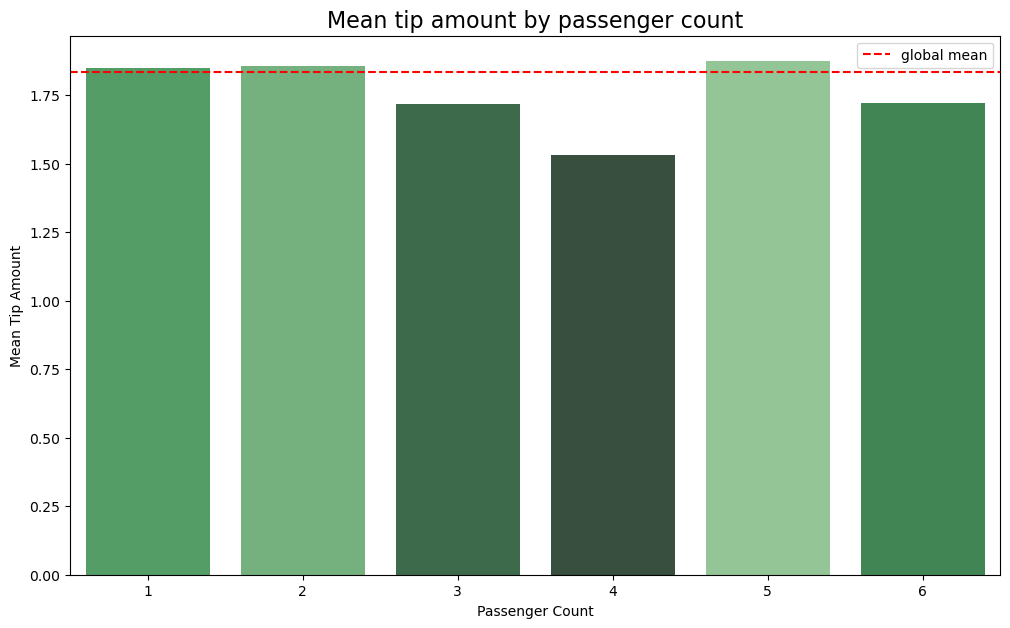

In [15]:
# Create bar plot for mean tips by passenger count
df['tip_amount'] = pd.to_numeric(df['tip_amount'], errors='coerce')
mean_tips_by_passenger_count = df.groupby('passenger_count')['tip_amount'].mean()

# Plotting
data = mean_tips_by_passenger_count.dropna().tail(-1)  # Dropping NaN and excluding undesired values
pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort()

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=data.index,
                 y=data.values,
                 palette=np.array(pal[::-1])[rank])
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=16)
plt.xlabel('Passenger Count')
plt.ylabel('Mean Tip Amount')
plt.show()


Mean tip amount varies very little by passenger count. Although it does drop noticeably for four-passenger rides, it's expected that there would be a higher degree of fluctuation because rides with four passengers were the least plentiful in the dataset (aside from rides with zero passengers).

In [16]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

**Plot total ride count by month**

In [17]:
# Get total number of rides for each month
monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

In [18]:
# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

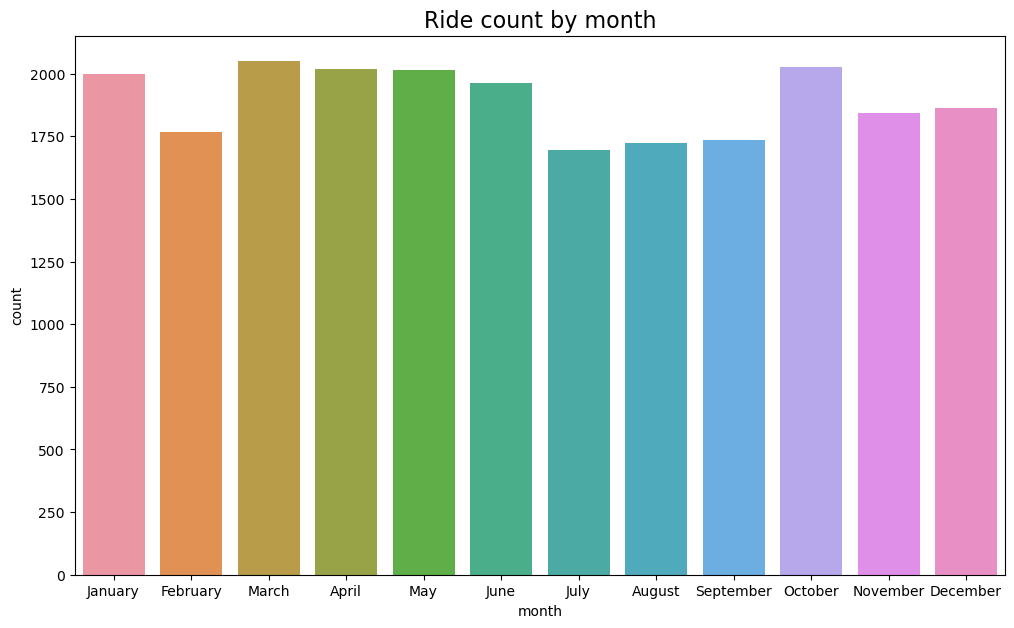

In [19]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)
ax.set_xticklabels(month_order)
plt.title('Ride count by month', fontsize=16);

Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.

In [20]:
# Repeat the above process, this time for rides by day
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

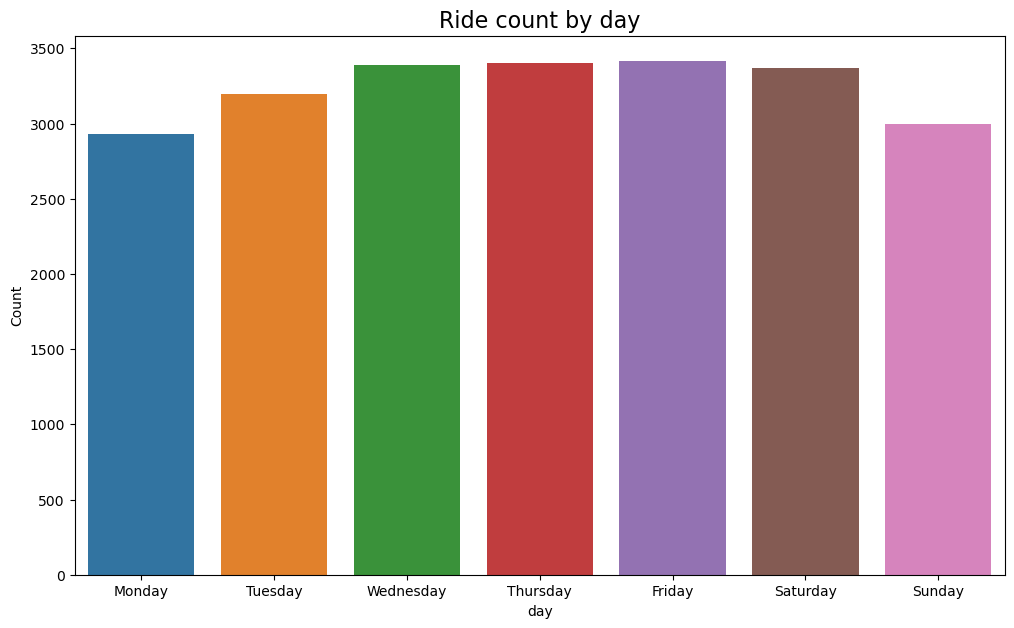

In [21]:
# Create bar plot for ride count by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Ride count by day', fontsize=16);

Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

In [26]:
# Repeat the process, this time for total revenue by day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df.groupby('day')['total_amount'].sum()
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

day
Monday       49574.37
Tuesday      52527.14
Wednesday    55310.47
Thursday     57181.91
Friday       55818.74
Saturday     51195.40
Sunday       48624.06
Name: total_amount, dtype: float64

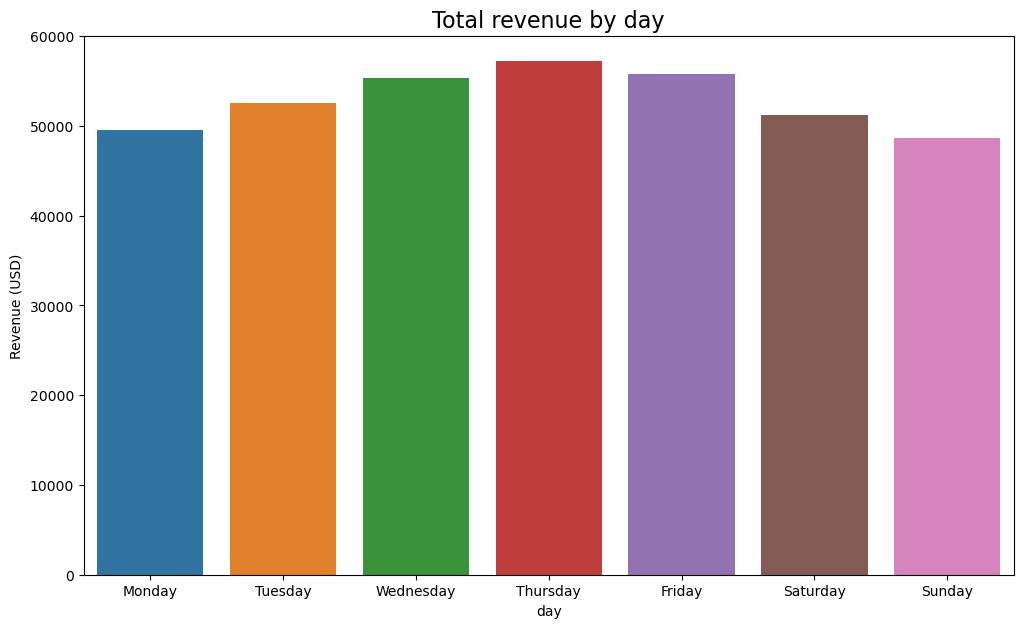

In [29]:
# Create bar plot of total revenue by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day)
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16);

Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's—more than a 10% drop.

In [30]:
# Repeat the process, this time for total revenue by day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_amount_day = df.groupby('day')['total_amount'].sum()
total_amount_day = total_amount_day.reindex(index=day_order)
total_amount_day

day
Monday       49574.37
Tuesday      52527.14
Wednesday    55310.47
Thursday     57181.91
Friday       55818.74
Saturday     51195.40
Sunday       48624.06
Name: total_amount, dtype: float64

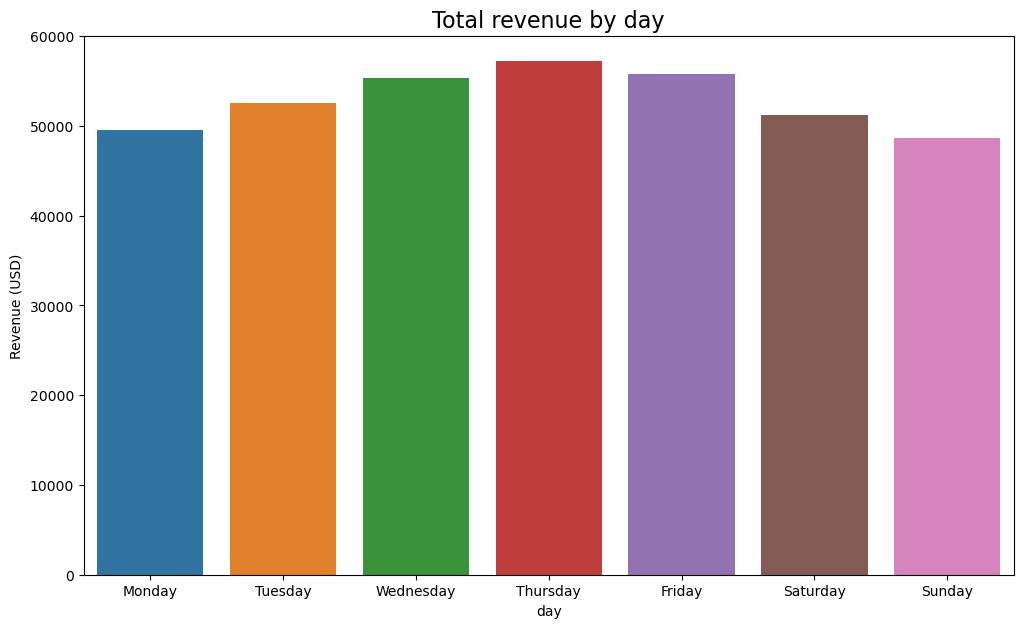

In [31]:
# Create bar plot of total revenue by day
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_day.index, y=total_amount_day)
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by day', fontsize=16);

Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's—more than a 10% drop.

In [32]:
# Repeat the process, this time for total revenue by month
total_amount_month = df.groupby('month')['total_amount'].sum()
total_amount_month = total_amount_month.reindex(index=month_order)
total_amount_month

month
January      31735.25
February     28937.89
March        33085.89
April        32012.54
May          33828.58
June         32920.52
July         26617.64
August       27759.56
September    28206.38
October      33065.83
November     30800.44
December     31261.57
Name: total_amount, dtype: float64

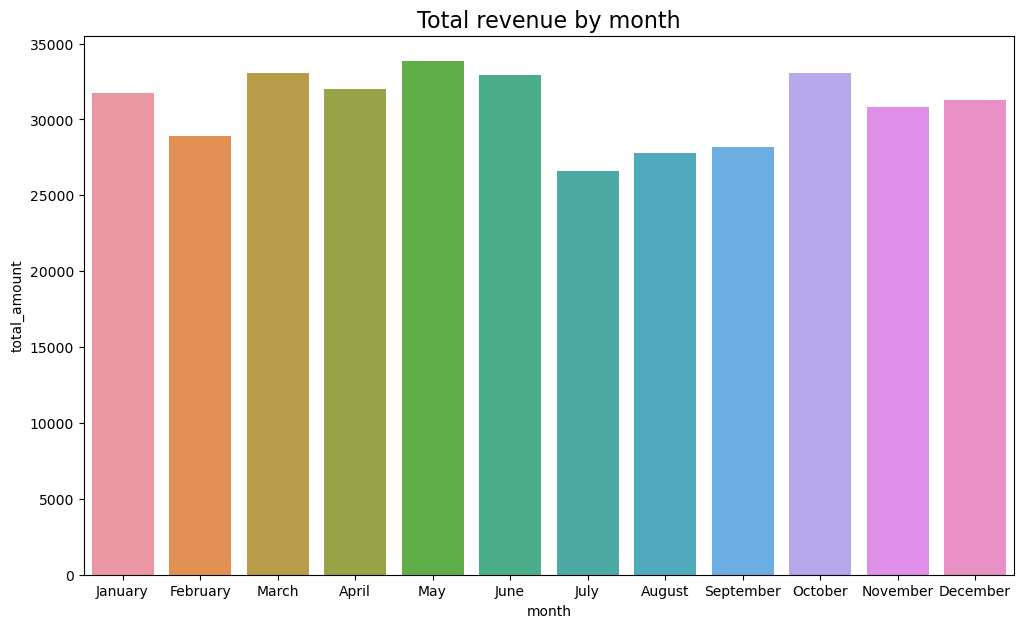

In [34]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(12,7))
ax = sns.barplot(x=total_amount_month.index, y=total_amount_month)
plt.title('Total revenue by month', fontsize=16);

Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.

**Plot mean trip distance by drop-off location**

In [36]:
# Convert 'trip_distance' column to numeric, coerce errors to NaN
df['trip_distance'] = pd.to_numeric(df['trip_distance'], errors='coerce')

# Filter out NaN or non-numeric values in 'trip_distance'
filtered_df = df.dropna(subset=['trip_distance'])

# Calculate the mean trip distance for each drop-off location
distance_by_dropoff = filtered_df.groupby('DOLocationID')['trip_distance'].mean()

# Sort the results in descending order by mean trip distance
distance_by_dropoff = distance_by_dropoff.sort_values()

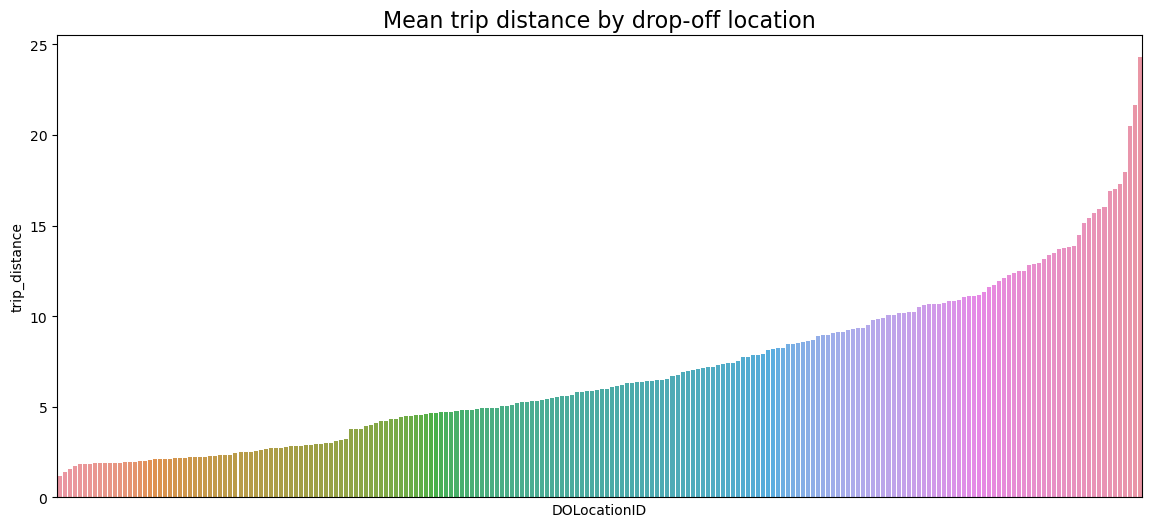

In [38]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff.index, 
                 y=distance_by_dropoff,
                 order=distance_by_dropoff.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

This plot presents a characteristic curve related to the cumulative density function of a normal distribution. In other words, it indicates that the drop-off points are relatively evenly distributed over the terrain. This is good to know, because geographic coordinates were not included in this dataset, so there was no obvious way to test for the distibution of locations.

To confirm this conclusion, consider the following experiment:

Generate Coordinate Samples: Create a dataset of 1,500 pairs of coordinates drawn from a normal distribution with a mean of 10 and a standard deviation of 5 for both x and y coordinates.

Calculate Distances: Compute the Euclidean distance between each pair of coordinates to determine their distances.

Grouping and Calculation: Group the coordinates by their endpoints and calculate the mean distance between each endpoint and all other points it was paired with.

Plotting: Plot the mean distances for each unique endpoint to observe the distribution of these distances.

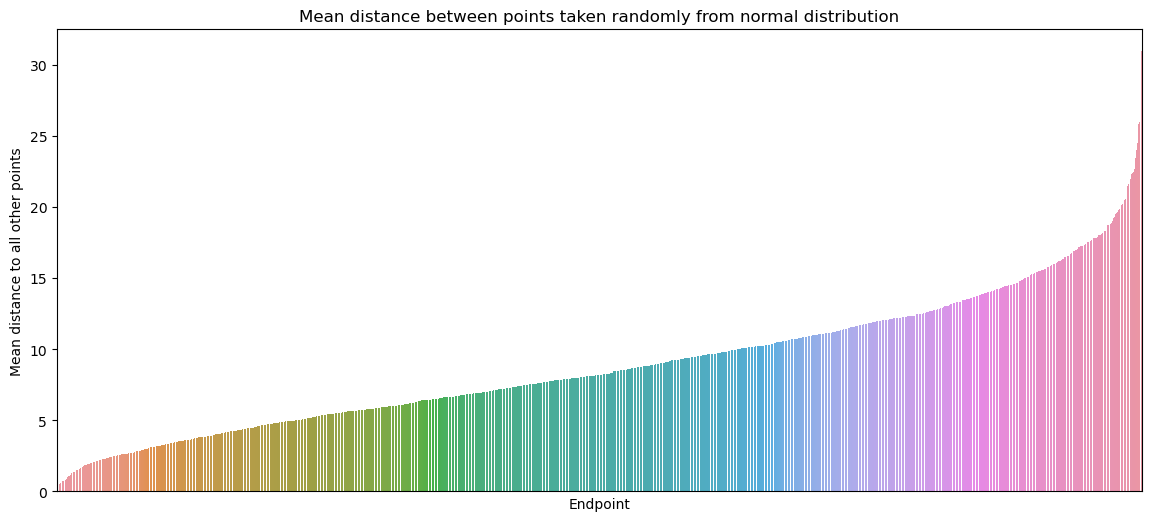

In [39]:
# 1. Generate random points on a 2D plane from a normal distribution
test = np.round(np.random.normal(10, 5, (3000, 2)), 1)
midway = int(len(test)/2)  # Calculate midpoint of the array of coordinates
start = test[:midway]      # Isolate first half of array ("pick-up locations")
end = test[midway:]        # Isolate second half of array ("drop-off locations")

# 2. Calculate Euclidean distances between points in first half and second half of array
distances = (start - end)**2           
distances = distances.sum(axis=-1)
distances = np.sqrt(distances)

# 3. Group the coordinates by "drop-off location", compute mean distance
test_df = pd.DataFrame({'start': [tuple(x) for x in start.tolist()],
                   'end': [tuple(x) for x in end.tolist()],
                   'distance': distances})
data = test_df[['end', 'distance']].groupby('end').mean()
data = data.sort_values(by='distance')

# 4. Plot the mean distance between each endpoint ("drop-off location") and all points it connected to
plt.figure(figsize=(14,6))
ax = sns.barplot(x=data.index,
                 y=data['distance'],
                 order=data.index)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel('Endpoint')
ax.set_ylabel('Mean distance to all other points')
ax.set_title('Mean distance between points taken randomly from normal distribution');

The curve described by this graph is nearly identical to that of the mean distance traveled by each taxi ride to each drop-off location. This reveals that the drop-off locations in the taxi dataset are evenly distributed geographically. Note, however, that this does not mean that there was an even distrubtion of rides to each drop-off point.

**Histogram of rides by drop-off location**

First, check whether the drop-off locations IDs are consecutively numbered. For instance, does it go 1, 2, 3, 4..., or are some numbers missing (e.g., 1, 3, 4...). If numbers aren't all consecutive, the histogram will look like some locations have very few or no rides when in reality there's no bar because there's no location.

In [40]:
# Check if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(set(df['DOLocationID'])) 

49

There are 49 numbers that do not represent a drop-off location.

To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other.

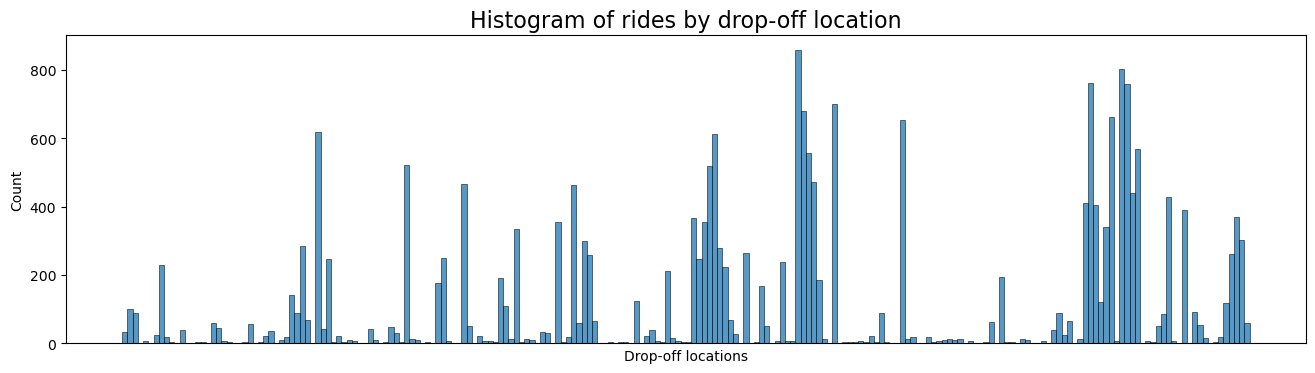

In [41]:
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

Notice that out of the 200+ drop-off locations, a disproportionate number of locations receive the majority of the traffic, while all the rest get relatively few trips. It's likely that these high-traffic locations are near popular tourist attractions like the Empire State Building or Times Square, airports, and train and bus terminals. However, it would be helpful to know the location that each ID corresponds with. Unfortunately, this is not in the data.

In [42]:
df['trip_duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

## Hypothesis testing

**Null hypothesis**: There is no difference in average fare between customers who use credit cards and customers who use cash. 
**Alternative hypothesis**: There is a difference in average fare between customers who use credit cards and customers who use cash

In [45]:
#hypothesis test, A/B test
#significance level = 5%
taxi_data = df.copy()
credit_card = taxi_data[taxi_data['payment_type'] == 1]['fare_amount']
cash = taxi_data[taxi_data['payment_type'] == 2]['fare_amount']
stats.ttest_ind(a=credit_card, b=cash, equal_var=False)

TtestResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12, df=16675.48547403633)

Since the p-value is significantly smaller than the significance level of 5%, the null hypothesis is rejected.

The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.

This project requires an assumption that passengers were forced to pay one way or the other, and that once informed of this requirement, they always complied with it. The data was not collected this way; so, an assumption had to be made to randomly group data entries to perform an A/B test. This dataset does not account for other likely explanations. For example, riders might not carry lots of cash, so it's easier to pay for longer/farther trips with a credit card. In other words, it's far more likely that fare amount determines payment type, rather than vice versa.

### Imputations

In [46]:
# Are trip distances of 0 bad data or very short trips rounded down?
sorted(set(df['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind.

#### `fare_amount` outliers

In [47]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

The range of values in the fare_amount column is large and the extremes don't make much sense.

Low values: Negative values are problematic. Values of zero could be legitimate if the taxi logged a trip that was immediately canceled.

High values: The maximum fare amount in this dataset is nearly $1,000, which seems very unlikely. High values for this feature can be capped based on intuition and statistics. The interquartile range (IQR) is $8. The standard formula of Q3 + (1.5 * IQR) yields $26.50. That doesn't seem appropriate for the maximum fare cap. In this case, we'll use a factor of 6, which results in a cap of $62.50.

Impute values less than $0 with 0.

In [48]:
# Impute values less than $0 with 0
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0
df['fare_amount'].min()

0.0

Now impute the maximum value as `Q3 + (6 * IQR)`

In [49]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df.loc[df[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [50]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



#### `duration` outliers

In [53]:
# Create `duration` column
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])/np.timedelta64(1,'m')

In [54]:
# Impute a 0 for any negative values
df.loc[df['duration'] < 0, 'duration'] = 0
df['duration'].min()

0.0

In [55]:
# Impute the high outliers
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



### Feature engineering

Create a column called mean_distance that captures the mean distance for each group of trips that share pickup and dropoff points.

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

In [56]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(2)

0    100 231
1     186 43
Name: pickup_dropoff, dtype: object

In [57]:
#Use a groupby() statement to group each row by the new pickup_dropoff column, 
#compute the mean, and capture the values only in the trip_distance column. 
#Assign the results to a variable named grouped.
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [58]:
#Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

#Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

In [59]:
# Create a mean_distance column that is a copy of the pickup_dropoff helper column
df['mean_distance'] = df['pickup_dropoff']

# Map `grouped_dict` to the `mean_distance` column
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [60]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

# Confirm that it worked
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [61]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()

# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [62]:
# Create 'rush_hour' col
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [63]:
def rush_hourizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [64]:
# Apply the `rush_hourizer()` function to the new column
df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_hourizer, axis=1)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,mar,saturday,0 days 00:14:04,14.066667,100 231,3.521667,22.847222,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,apr,tuesday,0 days 00:26:30,26.500000,186 43,3.108889,24.470370,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,dec,friday,0 days 00:07:12,7.200000,262 236,0.881429,7.250000,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,may,sunday,0 days 00:30:15,30.250000,188 97,3.700000,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,apr,saturday,0 days 00:16:43,16.716667,4 112,4.435000,14.616667,0


Create a scatterplot to visualize the relationship between mean_duration and fare_amount.

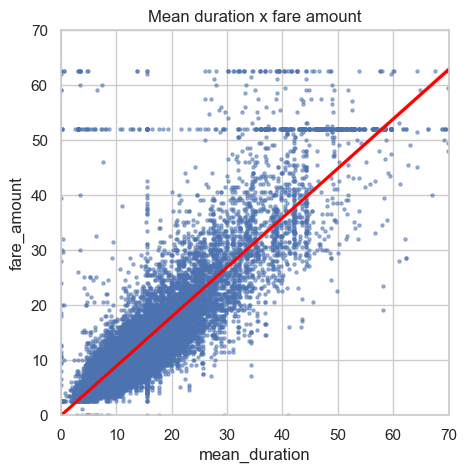

In [65]:
# Create a scatter plot of duration and trip_distance, with a line of best fit
sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df['mean_duration'], y=df['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

62 dollars and 50 cents is the maximum that was imputed for outliers

In [66]:
pd.set_option('display.max_columns', None)
df[df['fare_amount']==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,mar,sunday,0 days 00:36:48,36.800000,236 132,19.211667,40.500000,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,jun,saturday,0 days 01:06:51,66.850000,132 163,19.229000,52.941667,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,nov,saturday,0 days 00:00:58,0.966667,132 132,2.255862,3.021839,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,dec,wednesday,0 days 00:29:11,29.183333,132 79,19.431667,47.275000,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,sep,sunday,0 days 00:29:29,29.483333,132 234,17.654000,49.833333,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,feb,tuesday,0 days 00:39:50,39.833333,132 48,18.761905,58.246032,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,jun,monday,0 days 00:15:37,15.616667,228 88,4.730000,15.616667,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,aug,thursday,0 days 00:45:27,45.450000,132 48,18.761905,58.246032,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,sep,tuesday,0 days 00:42:51,42.850000,186 132,17.096000,42.920000,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,apr,sunday,0 days 01:11:35,71.583333,132 148,17.994286,46.340476,0


It seems that almost all of the trips in the first 30 rows where the fare amount was $52 either begin or end at location 132, and all of them have a RatecodeID of 2.

There is no readily apparent reason why PULocation 132 should have so many fares of 52 dollars. They seem to occur on all different days, at different times, with both vendors, in all months. However, there are many toll amounts of $5.76 and $5.54. This would seem to indicate that location 132 is in an area that frequently requires tolls to get to and from. It's likely this is an airport.

The data dictionary says that RatecodeID of 2 indicates trips for JFK, which is John F. Kennedy International Airport. A quick Google search for "new york city taxi flat rate $52" indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK airport (in Queens) and Manhattan.

Because RatecodeID is known from the data dictionary, the values for this rate code can be imputed back into the data after the model makes its predictions.

### Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [67]:
df2 = df.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)


C:\Users\Vlad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


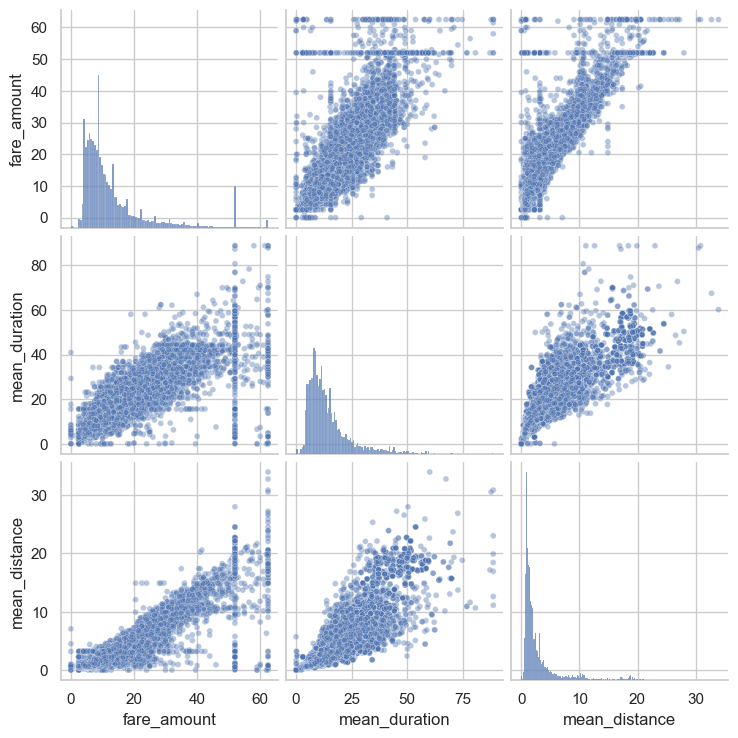

In [68]:
# Create a pairplot to visualize pairwise relationships between variables in the data

sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

These variables all show linear correlation with each other. Investigate this further.

### Identify correlations

In [69]:
# Create correlation matrix containing pairwise correlation of columns, using pearson correlation coefficient
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,trip_duration,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.037537,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.016838,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.171694,0.910185,0.859105,-0.020075
trip_duration,0.037537,0.016838,0.171694,1.000000,0.150286,0.205860,-0.002714
mean_distance,0.004741,0.013428,0.910185,0.150286,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.205860,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.002714,-0.039725,-0.021583,1.000000


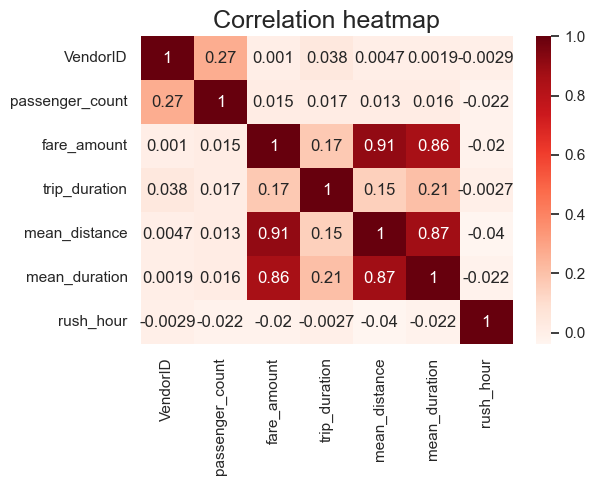

In [70]:
# Create correlation heatmap

plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

mean_duration and mean_distance are both highly correlated with the target variable of fare_amount They're also both correlated with each other, with a Pearson correlation of 0.87.

Recall that highly correlated predictor variables can be bad for linear regression models when you want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.

This model will predict fare_amount, which will be used as a predictor variable in machine learning models. Therefore, try modeling with both variables even though they are correlated.

### Split data into outcome variable and features

In [71]:
# Remove the target column from the features
X = df2.drop(columns=['fare_amount'])

# Set y variable
y = df2[['fare_amount']]

### Pre-process data

In [72]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first=True)

In [76]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
X_numerical = X[numerical_cols]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_numerical, y, test_size=0.2, random_state=0)

# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [77]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [78]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8398188754814234
R^2: 0.8398188754814234
MAE: 2.187327508771131
MSE: 17.892478925123488
RMSE: 4.2299502272631395


In [79]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [80]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8683215526051413
R^2: 0.8683215526051413
MAE: 2.132989346697138
MSE: 14.319582630947853
RMSE: 3.784122438683486


The model performance is high on both training and test sets, suggesting that there is little bias in the model and that the model is not overfit. In fact, the test scores were even better than the training scores.

For the test data, an R2 of 0.868 means that 86.8% of the variance in the fare_amount variable is described by the model.

The mean absolute error is informative here because, for the purposes of the model, an error of two is not more than twice as bad as an error of one.

### Results

In [81]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.412237,1.587763
18134,28.0,16.370797,11.629203
4655,5.5,6.771138,-1.271138
7378,15.5,16.282862,-0.782862
13914,9.5,10.471499,-0.971499


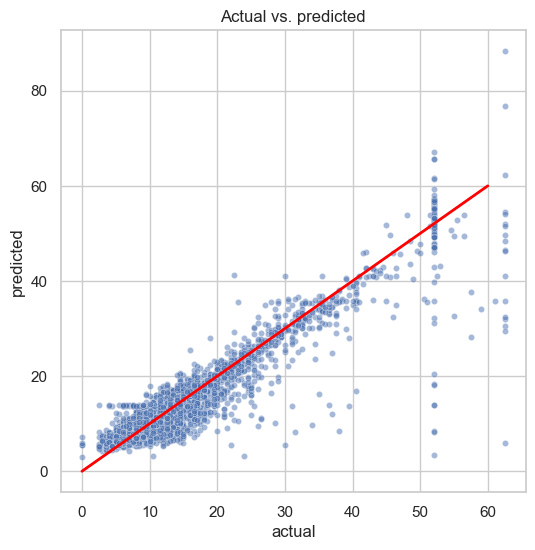

In [82]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

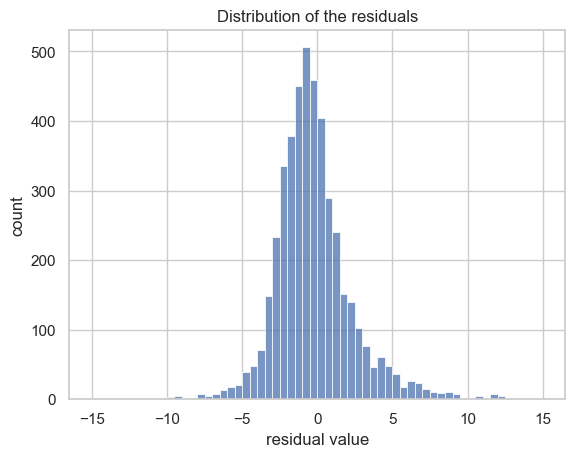

In [83]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [84]:
results['residual'].mean()

-0.015665670029750958

The distribution of the residuals is approximately normal and has a mean of -0.015. The residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution around zero is good, as it demonstrates that the model's errors are evenly distributed and unbiased.

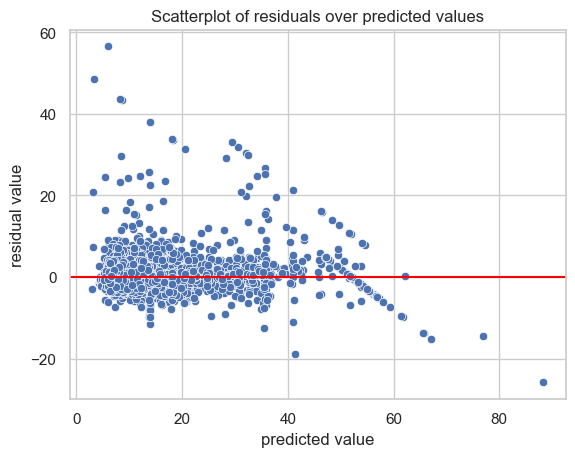

In [85]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

The model's residuals are evenly distributed above and below zero, with the exception of the sloping lines from the upper-left corner to the lower-right corner, which you know are the imputed maximum of $62.50 and the flat rate of $52 for JFK airport trips.

### Coefficients

In [91]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X_numerical.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour
0,0.016318,7.133471,2.812687,0.110314


To translate the coefficient from standard deviation units back to miles and provide a more intuitive interpretation:

Calculate Standard Deviation of Mean Distance in X_train Data:
Calculate the standard deviation of the 'mean_distance' feature in the X_train dataset.

Convert Coefficient from Standard Deviation to Miles:
Divide the coefficient value (7.133867) by the standard deviation of 'mean_distance' to obtain a more relatable interpretation in terms of miles traveled.

In [92]:
# Calculate SD of `mean_distance` in X_train data
print(X_train['mean_distance'].std())

# Divide the model coefficient by the standard deviation
print(7.133867 / X_train['mean_distance'].std())

3.574812975256415
1.9955916713344426


Interpretation: for every 3.57 miles traveled, the fare increased by a mean of \\$7.13. Or, reduced: for every 1 mile traveled, the fare increased by a mean of \\$2.00.